### K-Means Clustering

Unsupervised clustering algorithms are an efficient means to identify groups of related objects within large populations. Here I implement the following k-means clustering algorithm and apply them to the data in cluster.txt. The file contains data as: x, y, class. I have removed lines that are empty or that are invalid data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.metrics import confusion_matrix

The regular expression - regexp used here filters the data we need from any invalid data from the original 'cluster.txt' file.

In [2]:
with open('cluster.txt') as f:
    lines = f.readlines()
    
regexp = "^\d+\.\d+ \d+\.\d+ [a-zA-Z]+_?[a-zA-Z]*" # regular expression

lines = [i for i in lines if re.search(regexp, i)]  # valid lines from the text file

r = len(lines) # number_data_samples
c = 3 # number_clusters

# split the data from the original string
data = []
for i in range(len(lines)):
    data.append(lines[i].split())
class_label = []
data1 = []
data2 = []
for i in range(len(data)):
    class_label.append(data[i][2].replace('\n','')) # classes_label
    data1.append(float(data[i][0])) # feature 1
    data2.append(float(data[i][1])) # feature 2
x = np.empty((len(data), 2))
x[:,0] = data1
x[:,1] = data2
"""
r = len(x) 
c = 3
"""

classes = []
classes.append(class_label[0])
for i in class_label:
        if i not in classes:
            classes.append(i)
x_pclass = []
for i in range(r):
    if class_label[i] == "Head":
        x_pclass.append(0)
    elif class_label[i] == "Ear_left":
        x_pclass.append(1)
    elif class_label[i] == "Ear_right":
        x_pclass.append(2)
x_pclass = np.array(x_pclass) + 1           
train_data = np.zeros((r,c))
train_data[:,0] = x[:,0] # feature 1
train_data[:,1] = x[:,1] # feature 2
train_data[:,2] = x_pclass[:] # numerical value of the class labels
count = 0
for i in range(len(train_data)):
    if train_data[i,2] == 3:
        count += 1


Use K-Means clustering with 3-clusters to label each (x,y) pair as Head, Ear Right, or Ear Left. You may use any standard NumPy or SciPy packages or experiment with your own implementation.

In [3]:
# learn the training data using kmeans function from the scipy python library.

from scipy import cluster
centers, distortion = cluster.vq.kmeans(train_data[:,0:2], 3, 11)


In [4]:
#print(centers)
indices = np.argsort(centers, axis = 0)[:,0]
centroids = []
for i in indices:
    centroids.append(centers[i,:])
centroids = np.reshape(centroids, (3,2))


In [5]:
def distance(r,c, x, centers):
    Distance = np.zeros((r,c))
    for i in range(r):
        for j in range(c):
            Distance[i,j] = np.linalg.norm(x[i,:] - centers[j,:])
            #Distance_x2[i,j] = np.linalg.norm(x[i,:] - centers[j,:])
            
    
    return Distance

D = distance(r,c, x, centroids)

x_class = np.zeros((r,))
class_target = []
for i in range(r):
    x_class[i] = np.argmin(D[i,:])
    if x_class[i] == 0: # ear_left
        class_target.append(classes[1])
    elif x_class[i] == 1: # head
        class_target.append(classes[0])
    elif x_class[i] == 2: # ear_right
        class_target.append(classes[2])
x_class = x_class + 1

target_data = np.zeros((r,c))
target_data[:,0] = train_data[:,0]
target_data[:,1] = train_data[:,1]
target_data[:,2] = x_class[:]



Text(0.5, 1.0, 'After Classification')

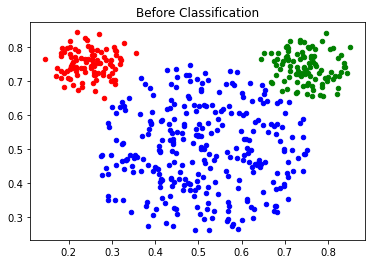

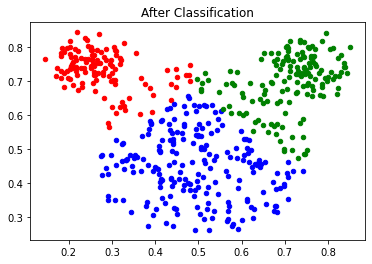

In [6]:
x1_before3 = []
x2_before3 = []
x1_after3 = []
x2_after3 = []
x1_before2 = []
x2_before2 = []
x1_after2 = []
x2_after2 = []
x1_before1 = []
x2_before1 = []
x1_after1 = []
x2_after1 = []
for i in range(len(x_class)):
    if train_data[i,2] == 3: #ear-right
        x1_before3.append(train_data[i,0])
        x2_before3.append(train_data[i,1])
    if target_data[i,2] == 3:
        x1_after3.append(target_data[i,0])
        x2_after3.append(target_data[i,1])
        
    if train_data[i,2] == 2: #ear-left
        x1_before2.append(train_data[i,0])
        x2_before2.append(train_data[i,1])
    if target_data[i,2] == 2:
        x1_after2.append(target_data[i,0])
        x2_after2.append(target_data[i,1])
        
    if train_data[i,2] == 1: # head
        x1_before1.append(train_data[i,0])
        x2_before1.append(train_data[i,1])
    if target_data[i,2] == 1:
        x1_after1.append(target_data[i,0])
        x2_after1.append(target_data[i,1])
plt.figure()      
plt.scatter(x1_before1, x2_before1, s=20, c= 'Blue') # head
plt.scatter(x1_before2, x2_before2, s=20, c= 'Red') # ear_left
plt.scatter(x1_before3, x2_before3, s=20, c= 'Green') # ear_right
plt.title("Before Classification")

plt.figure()
plt.scatter(x1_after1, x2_after1, s=20, c= 'Red') # ear_left
plt.scatter(x1_after2, x2_after2, s=20, c= 'Blue')  # head
plt.scatter(x1_after3, x2_after3, s=20, c= 'Green') # ear_right
plt.title("After Classification")

### Confusion Matrix

In [7]:
## computing confusion matrix using sklearn
cm = confusion_matrix(class_label, class_target)

Classes: 0:Ear_left, 1:Ear_right, 2:Head
Confusion Matrix:
 [[100   0   0]
 [  0 100   0]
 [ 25  54 211]]


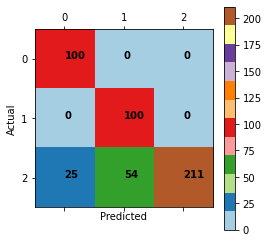

In [8]:
def plot_cm(CM, title='Confusion matrix', cmap=plt.cm.Paired):
    
    
    
    plt.matshow(CM, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
    for i in range(3):
        for j in range(3):
            plt.text(j, i, CM[i,j], fontweight = 700, color="black") 

plot_cm(cm)
print("Classes: 0:Ear_left, 1:Ear_right, 2:Head")
print("Confusion Matrix:\n",cm)

### Accuracy

In [10]:
accuracy = 0

for i in range(3):
    for j in range(3):
        if i != j:
            accuracy += cm[i,j]
accuracy = (r-accuracy)*100/r
print("Accuracy of k-means: "+ str(accuracy) + "%")

Accuracy of k-means: 83.87755102040816%
